In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
train.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [57]:
test.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [58]:
train.shape

(140404, 56)

In [59]:
# Mencari unique value untuk categorical features
characteristics_cat = train.copy()

columnsdrop = characteristics_cat.select_dtypes(include=['int64', 'float64']).columns[
    (characteristics_cat.select_dtypes(include=['int64', 'float64']).nunique() > 2) &
    (characteristics_cat.select_dtypes(include=['int64', 'float64']).columns != 'label')
]

characteristics_cat = characteristics_cat.drop(columns=columnsdrop)
characteristics_cat.nunique()

FILENAME                 82872
URL                      96914
Domain                   69832
IsDomainIP                   2
TLD                        497
HasObfuscation               2
IsHTTPS                      2
HasTitle                     2
Title                    79460
HasFavicon                   2
Robots                       2
IsResponsive                 2
NoOfURLRedirect              2
NoOfSelfRedirect             2
HasDescription               2
HasExternalFormSubmit        2
HasSocialNet                 2
HasSubmitButton              2
HasHiddenFields              2
HasPasswordField             2
Bank                         2
Pay                          2
Crypto                       2
HasCopyrightInfo             2
label                        2
dtype: int64

In [60]:
# Mencari data describe
filtered_df = train.copy()

columnsdrop = filtered_df.select_dtypes(include=['int64', 'float64']).columns[
  filtered_df.select_dtypes(include=['int64', 'float64']).nunique() == 2
] # Drop columns yang memiliki unique value == 2 diasumsikan sebagai boolean (cat variable)

filtered_df = filtered_df.drop(columns=columnsdrop)

filtered_df.select_dtypes(include=['int64', 'float64']).describe()

,id,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,...,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,140404.000000,79765.000000,94085.000000,92362.000000,87531.000000,88333.000000,92673.000000,96344.000000,73606.000000,75806.000000,...,90407.000000,88188.000000,97051.000000,90460.000000,89932.000000,73270.000000,79603.000000,92272.000000,97718.000000,71025.000000
mean,117682.632746,27.701473,19.619387,0.918007,0.277482,0.059286,2.729015,1.161442,0.005951,0.000028,...,70.832896,71.133832,0.359749,2.508125,41.647489,10.268623,16.461729,104.875900,3.733846,78.104273
std,68122.005080,23.140676,5.833808,0.159142,0.248115,0.008063,0.533310,0.445054,1.082855,0.001697,...,45.039128,44.886539,4.788340,7.815329,102.538702,133.321659,21.001274,219.137035,24.192458,187.106965
min,1.000000,14.000000,4.000000,0.000000,0.000000,0.001229,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58689.500000,23.000000,16.000000,0.913043,0.012927,0.055542,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,6.000000,24.000000,0.000000,13.000000
50%,117421.500000,26.000000,19.000000,1.000000,0.522907,0.060264,3.000000,1.000000,0.000000,0.000000,...,100.000000,100.000000,0.000000,1.000000,23.000000,5.000000,12.000000,69.000000,0.000000,39.000000
75%,176724.250000,30.000000,23.000000,1.000000,0.522907,0.064391,3.000000,1.000000,0.000000,0.000000,...,100.000000,100.000000,0.000000,2.000000,45.000000,12.000000,22.000000,132.000000,3.000000,99.000000
max,235795.000000,4054.000000,93.000000,1.000000,0.522907,0.088766,13.000000,7.000000,291.000000,0.212000,...,100.000000,100.000000,602.000000,1602.000000,8956.000000,35820.000000,2828.000000,26596.000000,4887.000000,27516.000000


In [61]:
# Mencari jumlah missing value dan proporsinya
def null_stats(data):
    null_counts = data.isnull().sum()
    null_percentage = (null_counts / len(data) * 100).round(2)

    null_df = pd.DataFrame({
        'Total Null Values': null_counts,
        'Percentage of Nulls (%)': null_percentage
    })

    null_df = null_df[null_df['Total Null Values'] > 0].sort_values(by='Total Null Values', ascending=False)

    return null_df

In [62]:
null_stats(train)

,Total Null Values,Percentage of Nulls (%)
Domain,70197,50.00
NoOfExternalRef,69379,49.41
LineOfCode,69153,49.25
HasSocialNet,67999,48.43
LargestLineLength,67928,48.38
NoOfURLRedirect,67384,47.99
HasCopyrightInfo,67345,47.97
NoOfCSS,67134,47.81
NoOfObfuscatedChar,66798,47.58
NoOfSelfRedirect,66715,47.52


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24996\2772648238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train[data[col_index]], palette="Blues", orient='v')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24996\2772648238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train[data[col_index]], palette="Blues", orient='v')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24996\2772648238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train[data[col_index]], palette="Blues", orient='v')
C:\Users\LENOVO\AppData\Local\Temp\ip

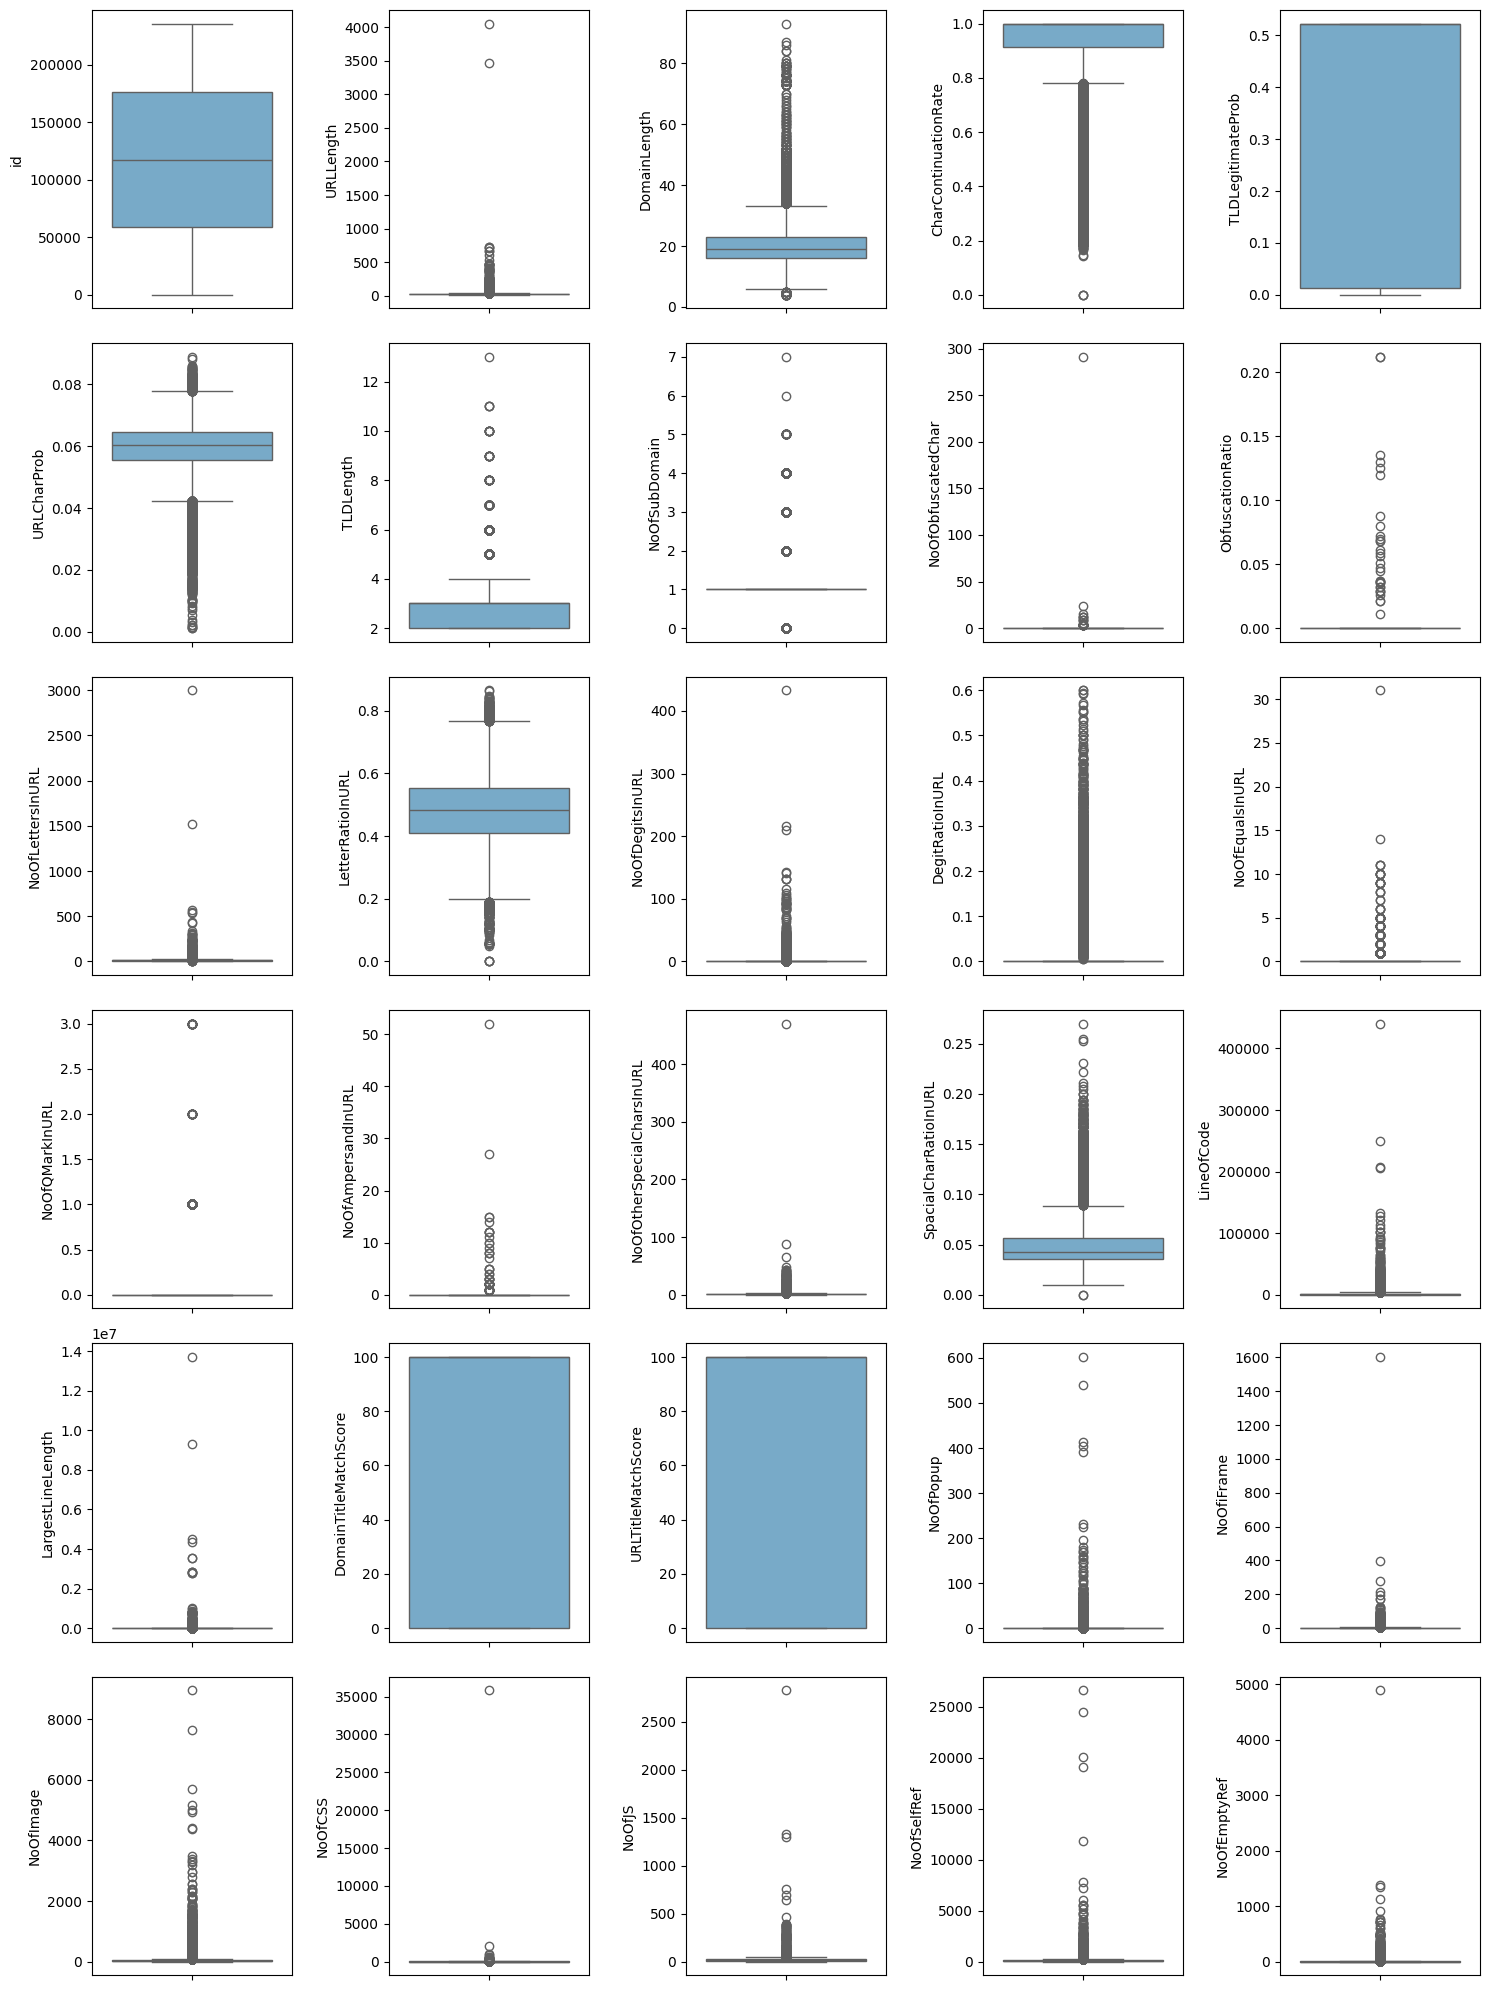

In [63]:
# Mencari terlebih dahulu atribut yang numerical variable
data = train.copy()
columnsdrop = data.select_dtypes(include=['int64', 'float64']).columns[
    data.select_dtypes(include=['int64', 'float64']).nunique() == 2
] # Drop columns yang memiliki unique value == 2 diasumsikan sebagai boolean (cat variable)

data = data.select_dtypes(include=['int64', 'float64']).drop(columns=columnsdrop).columns

# Mencari visualisasi boxplot untuk menemukan outliers yang merupakan numerical variables
rows = 6
cols = 5

fig = plt.figure(figsize=(15, 20))
row = 0

for i in range(1, rows + 1):
    for j in range(cols):
        col_index = j + row
        plt.subplot(rows, cols, (i - 1) * cols + j + 1)
        sns.boxplot(y=train[data[col_index]], palette="Blues", orient='v')
    row += cols

plt.tight_layout()
plt.show()

In [64]:
print("Rows before dropping duplicates:", len(train))
train.drop_duplicates(inplace=True)
print("Rows after dropping duplicates:", len(train))

train.reset_index(drop=True, inplace=True)

Rows before dropping duplicates: 140404
Rows after dropping duplicates: 140404


In [65]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [66]:
from sklearn.model_selection import train_test_split

# Save original training set
train_set_ori = train.copy()

X = train.drop(columns=['label'])  # without target variable
y = train['label']  # Target variable

# Split training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [67]:
X_train

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
28021,NaN,https://www.yc-tp.com,NaN,NaN,13.0,0.0,com,0.600000,0.522907,NaN,...,0.0,0.0,NaN,NaN,30.0,12.0,NaN,NaN,0.0,138.0
71026,NaN,NaN,25.0,NaN,18.0,NaN,com,NaN,NaN,0.061236,...,NaN,0.0,NaN,1.0,88.0,11.0,16.0,211.0,0.0,NaN
89927,133606.txt,https://www.autodesk.co.uk,25.0,NaN,18.0,0.0,NaN,0.818182,0.028555,NaN,...,0.0,NaN,0.0,1.0,31.0,NaN,25.0,NaN,1.0,NaN
94654,473296.txt,https://www.marketmanila.com,27.0,www.marketmanila.com,20.0,0.0,NaN,1.000000,NaN,0.066401,...,NaN,1.0,0.0,NaN,NaN,26.0,23.0,105.0,0.0,NaN
35275,NaN,https://www.re-course.org,NaN,NaN,17.0,0.0,org,NaN,NaN,NaN,...,1.0,1.0,0.0,1.0,NaN,11.0,17.0,23.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,NaN,https://www.gemathis.com,23.0,www.gemathis.com,16.0,0.0,com,1.000000,0.522907,NaN,...,0.0,NaN,0.0,1.0,NaN,2.0,NaN,106.0,7.0,NaN
119879,627933.txt,NaN,24.0,www.mural24.co.uk,NaN,0.0,uk,0.800000,NaN,NaN,...,0.0,1.0,0.0,NaN,166.0,3.0,7.0,NaN,1.0,NaN
103694,561645.txt,NaN,34.0,NaN,27.0,0.0,NaN,1.000000,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,42.0,NaN,25.0
131932,NaN,https://www.leinsterrugby.ie,27.0,NaN,20.0,0.0,ie,NaN,0.001588,0.052675,...,1.0,0.0,0.0,1.0,NaN,NaN,57.0,NaN,0.0,331.0


In [68]:
train

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140399,49490.txt,NaN,NaN,www.slavevoyages.org,NaN,0.0,NaN,1.000000,0.079963,0.059055,...,NaN,0.0,1.0,23.0,3.0,6.0,NaN,12.0,NaN,1
140400,NaN,https://www.greenmountainenergy.com,34.0,www.greenmountainenergy.com,NaN,0.0,com,1.000000,0.522907,0.064465,...,1.0,NaN,1.0,26.0,NaN,NaN,169.0,15.0,40.0,1
140401,NaN,https://www.leadcastingcall.com,30.0,www.leadcastingcall.com,23.0,NaN,NaN,1.000000,0.522907,NaN,...,0.0,0.0,1.0,25.0,NaN,NaN,87.0,1.0,93.0,1
140402,NaN,https://www.fedarb.com,21.0,NaN,14.0,NaN,NaN,1.000000,0.522907,NaN,...,0.0,0.0,1.0,NaN,36.0,NaN,102.0,NaN,NaN,1


In [69]:
test

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,0.081395,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,0.069183,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,0.050344,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,0.059065,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,0.035754,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,op274.txt,https://756-107694hr4g.weeblysite.com/,38.0,756-107694hr4g.weeblysite.com,29.0,0.0,com,NaN,0.522907,NaN,...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9996,684050.txt,NaN,39.0,www.interactive-sonification.org,32.0,0.0,org,0.541667,0.079963,0.066188,...,0.0,NaN,NaN,0.0,1.0,NaN,5.0,23.0,0.0,9.0
9997,NaN,https://fuchsiabrownsysadmin--ficohsa121.repl....,NaN,NaN,NaN,0.0,NaN,0.675676,0.005977,0.052057,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9998,565202.txt,https://www.benoit-mccarthy.com,NaN,www.benoit-mccarthy.com,23.0,0.0,NaN,0.600000,0.522907,0.063081,...,0.0,0.0,0.0,1.0,11.0,22.0,NaN,45.0,NaN,NaN


In [70]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

class FeatureImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        # Separate columns by type
        self.categorical_cols = ['TLD', 'Domain', 'FILENAME', 'URL', 'Title']
        self.boolean_cols = [
            'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon',
            'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription',
            'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
            'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo'
        ]
        self.numerical_cols = list(set(X.columns) - set(self.categorical_cols) - set(self.boolean_cols))
        
        # Imputer for categorical columns
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.cat_imputer.fit(X[self.categorical_cols])
        
        # Imputer for boolean columns
        self.bool_imputer = SimpleImputer(strategy='constant', fill_value=0)
        self.bool_imputer.fit(X[self.boolean_cols])
        
        self.num_imputer = SimpleImputer(strategy='mean')
        self.num_imputer.fit(X[self.numerical_cols])
        
        
        return self
    
    def transform(self, X):
        X_imputed = X.copy()

        # Impute categorical columns
        X_imputed[self.categorical_cols] = self.cat_imputer.transform(X_imputed[self.categorical_cols])

        # Impute boolean columns
        X_imputed[self.boolean_cols] = self.bool_imputer.transform(X_imputed[self.boolean_cols])
        #X_imputed[self.boolean_cols] = X_imputed[self.boolean_cols].astype(bool)  # Convert back to boolean

        # Impute numerical columns using IterativeImputer
        X_imputed[self.numerical_cols] = self.num_imputer.transform(X_imputed[self.numerical_cols])
        
        return X_imputed


In [ ]:
# Create feature dropper class
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.drop(columns=['FILENAME', 'URL', 'Domain', 'Title', 'TLD'], axis=1)
        return X.drop(columns=["FILENAME", "URL", "Domain", "TLD"], axis=1)

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import numpy as np

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        # Initialize LabelEncoders for each categorical column
        self.label_encoders = {}
        self.cat_cols = X.select_dtypes(include=['object']).columns

        for col in self.cat_cols:
            le = LabelEncoder()
            #le.fit(X[col].astype(str))  # Convert to string to handle NaN values
            self.label_encoders[col] = le

        return self

    def transform(self, X):
        X_encoded = X.copy()

        # Encode each categorical column
        for col, le in self.label_encoders.items():
            X_encoded[col] = X_encoded[col].astype(str).map(
                lambda x: le.transform([x])[0] if x in le.classes_ else -1
            )

        return X_encoded


In [73]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("dropper", FeatureDropper()),("imputer", FeatureImputer())])

In [75]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

KeyError: "None of [Index(['TLD', 'Domain', 'FILENAME', 'URL', 'Title'], dtype='object')] are in the [columns]"

In [ ]:
X_train

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
28021,100000.txt,https://www.yc-tp.com,27.696944,ipfs.io,13.000000,0.0,com,0.600000,0.522907,0.059299,...,0.0,0.0,0.0,0.0,30.000000,12.00000,16.42282,104.866657,0.000000,138.000000
71026,100000.txt,http://test-mantenimiento-bancaweb.azurewebsit...,25.000000,ipfs.io,18.000000,0.0,com,0.918224,0.277963,0.061236,...,0.0,0.0,0.0,1.0,88.000000,11.00000,16.00000,211.000000,0.000000,77.759982
89927,133606.txt,https://www.autodesk.co.uk,25.000000,ipfs.io,18.000000,0.0,com,0.818182,0.028555,0.059299,...,0.0,0.0,0.0,1.0,31.000000,10.40261,25.00000,104.866657,1.000000,77.759982
94654,473296.txt,https://www.marketmanila.com,27.000000,www.marketmanila.com,20.000000,0.0,com,1.000000,0.277963,0.066401,...,0.0,1.0,0.0,0.0,41.484433,26.00000,23.00000,105.000000,0.000000,77.759982
35275,100000.txt,https://www.re-course.org,27.696944,ipfs.io,17.000000,0.0,org,0.918224,0.277963,0.059299,...,1.0,1.0,0.0,1.0,41.484433,11.00000,17.00000,23.000000,0.000000,77.759982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,100000.txt,https://www.gemathis.com,23.000000,www.gemathis.com,16.000000,0.0,com,1.000000,0.522907,0.059299,...,0.0,0.0,0.0,1.0,41.484433,2.00000,16.42282,106.000000,7.000000,77.759982
119879,627933.txt,http://test-mantenimiento-bancaweb.azurewebsit...,24.000000,www.mural24.co.uk,19.604369,0.0,uk,0.800000,0.277963,0.059299,...,0.0,1.0,0.0,0.0,166.000000,3.00000,7.00000,104.866657,1.000000,77.759982
103694,561645.txt,http://test-mantenimiento-bancaweb.azurewebsit...,34.000000,ipfs.io,27.000000,0.0,com,1.000000,0.277963,0.059299,...,1.0,1.0,0.0,0.0,41.484433,10.40261,16.42282,42.000000,3.685215,25.000000
131932,100000.txt,https://www.leinsterrugby.ie,27.000000,ipfs.io,20.000000,0.0,ie,0.918224,0.001588,0.052675,...,1.0,0.0,0.0,1.0,41.484433,10.40261,57.00000,104.866657,0.000000,331.000000


In [ ]:
null_stats(X_train)

In [ ]:
# Menentukan jumlah outliers dengan menggunakan metode IQR
def find_outliers(data):
    outlier_stats_list = []
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
      if data[col].nunique() > 2:
        col_values = data[col].dropna().values
        q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
        iqr = q75 - q25

        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        outliers = data.loc[(data[col] > upper) | (data[col] < lower), col].count()

        outlier_stats_list.append({
            'Column': col,
            'Quartile (25)': q25,
            'Quartile (75)': q75,
            'IQR': iqr,
            'Cut-off': cut_off,
            'Lower Bound': lower,
            'Upper Bound': upper,
            'Total Outliers': outliers
        })

    outlier_stats_df = pd.DataFrame(outlier_stats_list)

    return outlier_stats_df

In [ ]:
find_outliers(X_train)

In [ ]:
class kNN():
    def __init__(self, k, metric="euclidean", p=None):
        self.k = k
        self.metric = metric
        self.p = p

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            majority = stats.mode(nearest_neighbours)[0][0]
            predictions.append(majority)
        return np.array(predictions)
        
    def euclidean(f1, f2):
        return np.sqrt(np.sum(f1-f2)**2)

    def manhattan(f1, f2):
        return np.sum(f1-f2)**2
        
    def minkowski(f1, f2, p):
        return np.sqrt(np.sum(f1-f2)**p)**(1/p)

    def hamming(f1, f2):
        return(0 if f1==f2 else 1)
            
    def get_neighbours(self, test_row):
        distances = list()

        for(train_row, train_class) in zip(self.X_train, self.y_train):
            if(self.metric == "euclidean"):
                d = self.euclidean(train_row, test_row)
            elif(self.metric == "manhattan"):
                d = self.manhattan(train_row, test_row)
            elif(self.metric == "minkowski"):
                d = self.minkowski(train_row, test_row, self.p)
            elif(self.metric == "hamming"):
                d = self.hamming(train_row, test_row)
            distances.append((d, train_class))

        distances.sort(key = lambda x:x[0])
        
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])

        return neighbours
        

In [ ]:
# Function to calculate accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan']:
    clf = kNN(k=5, metric=metric, p=None)
    clf.fit(X_train.values, y_train.values)
    preds = clf.predict(X_test.values)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')